<a href="https://colab.research.google.com/github/DitaAnatasya/google_colab/blob/main/KMeans_Dita_Anatasya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

##preprocessing

In [ ]:
data = pd.read_csv("HR Employee Attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
data = pd.read_csv("HR Employee Attrition.csv")
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
data.drop('YearsSinceLastPromotion', axis=1, inplace=True)

In [ ]:
data.drop('YearsInCurrentRole', axis=1, inplace=True)

In [ ]:
data.drop('YearsAtCompany', axis=1, inplace=True)

In [ ]:
data.drop('WorkLifeBalance', axis=1, inplace=True)

In [ ]:
data.drop('TotalWorkingYears', axis=1, inplace=True)

In [ ]:
data.drop('StockOptionLevel', axis=1, inplace=True)

In [ ]:
data.drop('StandardHours', axis=1, inplace=True)

In [ ]:
data.drop('RelationshipSatisfaction', axis=1, inplace=True)

In [ ]:
data.drop('PerformanceRating', axis=1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   BusinessTravel           1470 non-null   object
 3   DailyRate                1470 non-null   int64 
 4   Department               1470 non-null   object
 5   DistanceFromHome         1470 non-null   int64 
 6   Education                1470 non-null   int64 
 7   EducationField           1470 non-null   object
 8   EmployeeCount            1470 non-null   int64 
 9   EmployeeNumber           1470 non-null   int64 
 10  EnvironmentSatisfaction  1470 non-null   int64 
 11  Gender                   1470 non-null   object
 12  HourlyRate               1470 non-null   int64 
 13  JobInvolvement           1470 non-null   int64 
 14  JobLevel                 1470 non-null  

## Exploratory Data Analysis


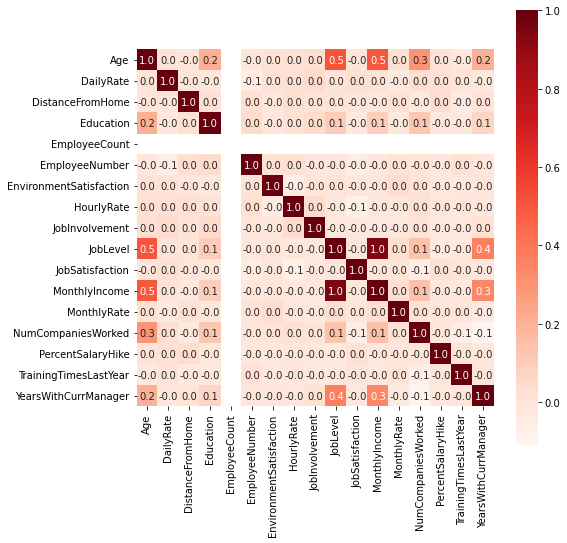

In [ ]:
# Menggunakan heatmap untuk mencari korelasi antara variabel
corr = data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,
            cbar=True,
            square=True,
            fmt=".1f",
            annot=True,
            cmap="Reds")

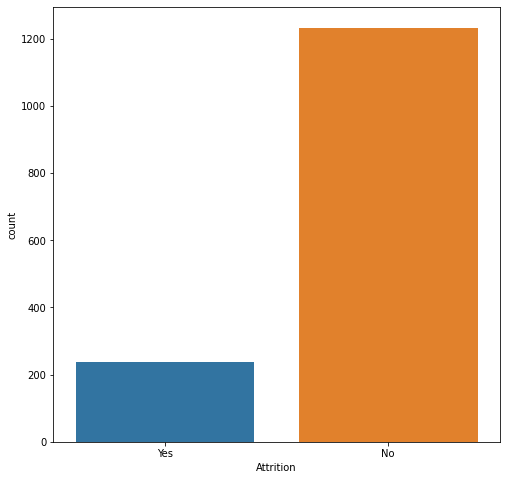

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x="Attrition", data=data)

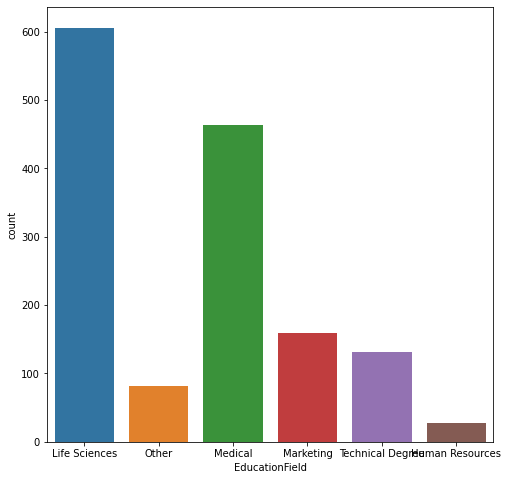

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x="EducationField", data=data)

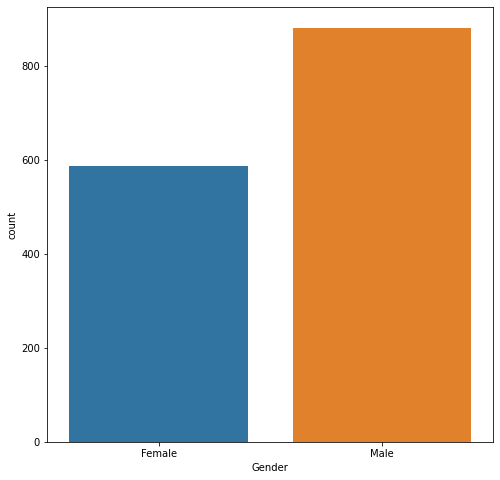

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x="Gender", data=data)

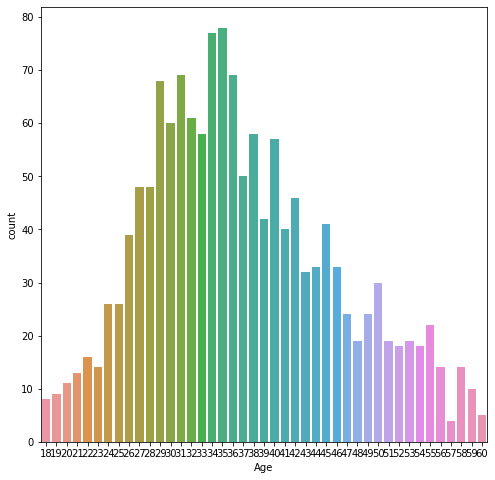

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x="Age", data=data)

##clusters


In [ ]:
X = data.iloc[:,[0, 3, 5]].values
X

array([[  41, 1102,    1],
       [  49,  279,    8],
       [  37, 1373,    2],
       ...,
       [  27,  155,    4],
       [  49, 1023,    2],
       [  34,  628,    8]])

In [ ]:
 wcss = []
 for i in range (1, 11):
   kmeans = KMeans(n_clusters=i, init='k-means++', random_state=50)
   kmeans.fit(X)
   wcss.append(kmeans.inertia_)
wcss

[239401123.18435368,
 59064526.74538716,
 27034083.076034542,
 14919077.13898725,
 9846587.550928343,
 6735666.29777549,
 5078123.570520362,
 4001725.312189446,
 3071346.87128497,
 2479299.893168001]

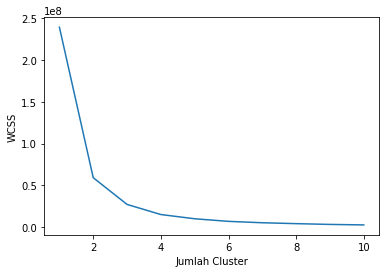

In [ ]:
sns.set
plt.plot(range(1, 11), wcss)
plt.xlabel("Jumlah Cluster")
plt.ylabel("WCSS")
plt.show()

##building the model

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)

In [ ]:
y=kmeans.fit_predict(X)

In [ ]:
X[y==0,2]

array([ 2,  2, 16, 26, 11,  6,  8,  2,  2,  5,  1,  3,  2,  5,  8,  1,  1,
       18,  7, 29,  7,  8,  1,  8,  1,  5,  1,  6,  9, 21,  1, 10,  6,  1,
        6,  6,  7,  3, 22,  6,  6,  2, 28, 12,  9, 28,  9, 10,  9,  1,  8,
        4,  9,  1,  1,  8, 27, 14,  4, 14,  1,  9, 21, 18, 10, 19, 18,  1,
        1,  3,  6,  1, 11,  1,  1, 18,  6,  1, 14,  2, 26,  5,  1, 15, 17,
        1,  1,  5, 29,  3,  1,  4,  1, 24, 23, 10,  4,  9, 18, 10,  7, 25,
        5,  8,  8,  7,  2,  7,  7, 20,  7,  9,  5, 23,  2, 25,  1,  1,  1,
        1,  9, 10, 22,  9,  3,  2, 12,  5,  4,  6,  1,  3,  3,  2,  2, 10,
       23, 10,  1,  2,  2,  1,  7, 29,  1,  6, 23, 28, 17, 13,  6,  1,  2,
        6,  9,  6,  9,  6,  6,  9,  3,  4,  8,  1,  2,  3, 10,  8,  1,  1,
        3, 14,  5,  7,  1, 19, 15,  8,  9,  9,  2,  7,  3, 26,  2, 27,  2,
       19,  1, 27,  8, 10,  1,  2,  8,  2,  1,  1,  1,  2,  4, 16,  2, 29,
       16, 14,  7,  2,  3,  5,  4,  1,  1,  5,  7,  9,  8, 25,  8,  9,  4,
        8, 25,  2,  9,  5

## Visualizing The Cluster

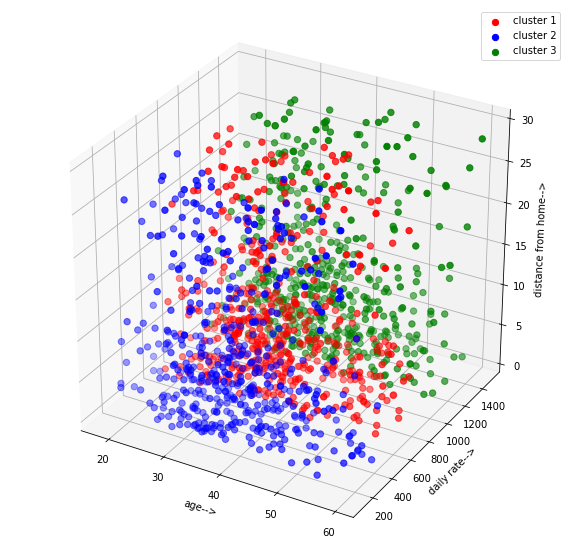

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[y == 0,0], X[y == 0,1], X[y == 0,2], s=40, color='red', label="cluster 1")
ax.scatter(X[y == 1,0], X[y == 1,1], X[y == 1,2], s=40, color='blue', label="cluster 2")
ax.scatter(X[y == 2,0], X[y == 2,1], X[y == 2,2], s=40, color='green', label="cluster 3")
ax.set_xlabel("age-->")
ax.set_ylabel("daily rate-->")
ax.set_zlabel("distance from home-->")
ax.legend()
plt.show()